<a href="https://colab.research.google.com/github/gutofranz/Colab_FastAI_Flow/blob/master/Visual_User_Interface_for_Jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

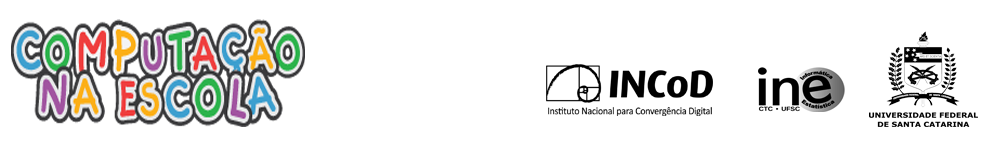
#Visual User Interface for Jupyter

Desenvolva o seu modelo de machine learning para a classificação de imagens neste ambiente visual de Jupyter Notebook.

*A interface visual foi criado pela Iniciativa Computação na Escola/INCoD/INE/UFSC.*

*Mais informações: link*

# Utilizando este notebook

Com algumas definições e X passos você já irá poder usar este notebook!

---

**Dataset:** Atualmente é possível se conectar em uma conta do google e posteriormente informar o diretório em que as imagens se encontram.

**Label:** O processo de label das imagens se dá única e exclusimente pela estrutura de pastas onde as imagens se encontram

**Execução:** A execução se divide em dois passos

1.   É necessário rodar a próxima célula para carregar no notebook a interface visual. Uma vez carregado não será necessário executá-la novamente durante o uso. É normal demorar pois todos os frameworks são importados nesta etapa.

2.   A última célula deve ser executada para dar inicio a interface visual assim sendo possível começar o processo de ML. Atualmente em caso de erro ou caso deseje começar de novo voce deverá executar essa célula novamente.



In [1]:
#@title Execute esta célula para preparar a interface visual

#Importacao via python da biblioteca fastai
! [ -e /content ] && pip install -Uqq fastai  

#Importações do google colab
from google.colab import drive
from google.colab import widgets as colabwidigets
from google.colab import output  as colaboutputs

#Importações Ipywidigets
from ipywidgets import widgets as ipywidgets
from ipywidgets import Box, Layout, Label

#Importações Fastai
from fastai.data.all import *
from fastai.vision.core import *
from fastai.vision    import *
from fastai.vision.all import *

from fastai.vision.widgets import *

# Importacao para conversao e visualiza;áo
from PIL import Image
import os
import progressbar

# Função para a conexão com o GDrive
def drive_connect():
  drive.mount('/content/gdrive', force_remount=True)
  drive_connect.root_dir = "/content/gdrive/My Drive/"
  print('Google Drive conectado com sucesso')

# Função para ser executada, encapsula tudo
def ui():

  # Executa a conexão com o GDrive
  drive_connect()

  # Insere o Header antes das abas ### Resolver essa imagem!
  try:
    file = open("/content/gdrive/MyDrive/Visual design/logos/Barra4Logos-preto.png", "rb")
    image = file.read()
    img_header = ipywidgets.Image(value=image,
                                format='png',
                                width='950px',
                                heigh='90%')
    display(img_header)
  except:
    print('Não foi possível exibir o header')
    
  # Guarda o Path para a execução em diversas abas 
  def build_path(path):
    global _path
    global _Path
    _path = path
    _Path = Path(path)
    
  # Função para a criação do DataLoader, guarda o DLS para a execução em diversas abas 
  def build_data(path_fun, item_tfms_resize, item_tfms_resize_mtd, splitter_percent_validation, batch_tfms_aug_tfms_size, splitter_bs):
    data = get_image_files(path_fun)

    # Splitter
    splitter = RandomSplitter(valid_pct=splitter_percent_validation,
                              seed=40)
    splitter(data)
        
    # Transformações
    item_tfms = [Resize(item_tfms_resize, 
                        method=item_tfms_resize_mtd)]

    batch_tfms=[*aug_transforms(size=batch_tfms_aug_tfms_size), 
                Normalize.from_stats(*imagenet_stats)]  
        
    # Criação do DataBlock
    blocks=(ImageBlock,CategoryBlock)
    
    get_image_files(path_fun)    
    trees = DataBlock(blocks=blocks,
                      get_items=get_image_files,
                      splitter=splitter,
                      get_y=parent_label,
                      item_tfms=item_tfms,
                      batch_tfms=batch_tfms)
        
    # Criação do DataLoader
    global _dls
    _dls = trees.dataloaders(path_fun, bs=splitter_bs)
    
    
  def create_learner(model_architecture):
    # Definição dos Callbacks
    defaults.callbacks[1] = Recorder(train_metrics=True)
    defaults.callbacks
    cbs=[ShowGraphCallback,
         ActivationStats(with_hist=True),
         SaveModelCallback,]

    # Criação do learner e fit one cycle
    global _learn
    
    _learn = cnn_learner(_dls,
                                   model_architecture,
                                   metrics=(error_rate,accuracy),
                                   cbs=cbs)

    
  # Função para a realização do treinamento, guarda o LEARN e o INTERP para a execução em diversas abas 
  def train_data(epochs):
    _learn.fit_one_cycle(epochs,1e-2)
    
    global _interp

    _interp = ClassificationInterpretation.from_learner(_learn)

  def converte_jpeg(path):
    if path == "":
      path = _Path 
    listy = os.listdir(path)
    for file in progressbar.progressbar(listy):
        if os.path.isdir(str(path)+"/"+file):
            converte_jpeg(str(path)+"/"+file)
        elif not file.split(".")[1] == "jpg":
            Image.open(path + "/" + file).convert('RGB').save("{0}/{1}.jpg".format(path,file.split(".")[0]))

	# Criação do painel que vai conter as abas
  tab = colabwidigets.TabBar(['Análise de Requisitos',
                              'Dados',
                              'Transfer Learning',
                              'Av. des. TL',
                              'Fine Tuning', 
                              'Av. Des. FT',
                              'Predição', 
                              'Deployment'
                              ])

  # CSS e Layout/Styles
  ## Em desenvolvimento
  item_layout = Layout(
      width='90%')

  b_layout = Layout(
      flex_flow='column',
      align_items='center',
      width='1000px')
  
  b_layout_2 = Layout(
      flex_flow='row',
      align_items='center',
      width='900px')  
  
  st_html_i = "<p style=font-family:Arial>"
  st_html_f = "</p>"
  
  # Execução da Primeira aba: Análise de Requisitos
  with tab.output_to(0, select=False): #):  

    # Criação do grid que vai conter as etapas e entradas/saídas
    grid0 = colabwidigets.Grid(1,1)
    # Atividade - Exportar modelo
    with grid0.output_to(0,0):

      lbl_tarefa = ipywidgets.HTML(value=st_html_i + '<b>Tarefa <b/>' + st_html_f, layout=item_layout)
      txta_tarefa = ipywidgets.Textarea(value='',
                                        placeholder='Descreva a tarefa aqui',
                                        disabled=False,
                                        layout=item_layout)
      
      lbl_tipotarefa = ipywidgets.HTML(value=st_html_i + '<b>Tipo da Tarefa <b/>' + st_html_f, layout=item_layout)
      txta_tipotarefa = ipywidgets.Textarea(value='',
                                        placeholder='Descreva o tipo da tarefa aqui',
                                        disabled=False,
                                        layout=item_layout)

      lbl_cat = ipywidgets.HTML(value=st_html_i + '<b>Categorias <b/>' + st_html_f, layout=item_layout)
      txta_cat1 = ipywidgets.Textarea(value='',
                                        placeholder='Descrição das categorias aqui',
                                        disabled=False,
                                        layout=item_layout)
      
      txta_cat2 = ipywidgets.Textarea(value='',
                                        placeholder='Descreva as categorias aqui',
                                        disabled=False,
                                        layout=item_layout)

      lbl_experiencia = ipywidgets.HTML(value=st_html_i + '<b>Experiência <b/>' + st_html_f, layout=item_layout)
      txta_experiencia = ipywidgets.Textarea(value='',
                                        placeholder='Descreva a experiência',
                                        disabled=False,
                                        layout=item_layout)

      lbl_fontededados = ipywidgets.HTML(value=st_html_i + '<b>Fonte de dados <b/>' + st_html_f, layout=item_layout)
      txta_fontededados = ipywidgets.Textarea(value='',
                                        placeholder='Descreva a fonte de dados',
                                        disabled=False,
                                        layout=item_layout)

      lbl_qtddedados = ipywidgets.HTML(value=st_html_i + '<b>Quantidade de dados <b/>' + st_html_f, layout=item_layout)
      txta_qtddedados = ipywidgets.Textarea(value='',
                                        placeholder='Descreva a quantidade de dados',
                                        disabled=False,
                                        layout=item_layout)
      
      lbl_pdr_img = ipywidgets.HTML(value=st_html_i + '<b>Padronização das imagens <b/>' + st_html_f, layout=item_layout)
      txta_pdr_img1 = ipywidgets.Textarea(value='',
                                        placeholder='Descrição o formato das imagens aqui',
                                        #description='Formato:',
                                        disabled=False,
                                        layout=item_layout)
      
      txta_pdr_img2 = ipywidgets.Textarea(value='',
                                        placeholder='Descreva o tamanho das imagens aqui',
                                        #description='Tamanho:',
                                        disabled=False,
                                        layout=item_layout)

      lbl_rotulacao = ipywidgets.HTML(value=st_html_i + '<b>Rotaluação dos dados <b/>' + st_html_f, layout=item_layout)
      txta_rotulacao = ipywidgets.Textarea(value='',
                                        placeholder='Descreva a rotulação dos dados',
                                        disabled=False,
                                        layout=item_layout)

      lbl_desempenho = ipywidgets.HTML(value=st_html_i + '<b>Desempenho <b/>' + st_html_f, layout=item_layout)
      txta_desempenho = ipywidgets.Textarea(value='',
                                        placeholder='Descreva o desempenho desejado',
                                        disabled=False,
                                        layout=item_layout)

      lbl_medidas = ipywidgets.HTML(value=st_html_i + '<b>Medidas <b/>' + st_html_f, layout=item_layout)
      txta_medidas1 = ipywidgets.Textarea(value='',
                                        placeholder='Descreva a medida que será utilizada',
                                        #description='Medida:',
                                        disabled=False,
                                        layout=item_layout)
      
      txta_medidas2 = ipywidgets.Textarea(value='',
                                        placeholder='Descreva o valor desejado aqui',
                                        #description='Valor:',
                                        disabled=False,
                                        layout=item_layout)
      

      itens_req = [Box([lbl_tarefa, txta_tarefa], layout=b_layout),
                   Box([lbl_tipotarefa, txta_tipotarefa], layout=b_layout),
                   Box([lbl_cat, Box([txta_cat1, txta_cat2], layout=b_layout_2)], layout=b_layout),
                   Box([lbl_experiencia, txta_experiencia], layout=b_layout),
                   Box([lbl_fontededados, txta_fontededados], layout=b_layout),
                   Box([lbl_qtddedados, txta_qtddedados], layout=b_layout),
                   Box([lbl_pdr_img,Box([txta_pdr_img1, txta_pdr_img2], layout=b_layout_2)], layout=b_layout),
                   Box([lbl_rotulacao, txta_rotulacao], layout=b_layout),
                   Box([lbl_desempenho, txta_desempenho], layout=b_layout),
                   Box([lbl_medidas,Box([txta_medidas1, txta_medidas2], layout=b_layout_2)], layout=b_layout)
                   ]

      vb_ir = ipywidgets.VBox(children=itens_req)

      display(vb_ir)

  # Execução da Segunda aba: Dados
  with tab.output_to(1):#, select=False):
    
    # Criação da primeira grid que vai conter as etapas e entradas/saídas
    grid1 = colabwidigets.Grid(15,1)  
        
    # Atividade - Definir Path
    with grid1.output_to(0,0):

      display('Dataset/OK') ## temporario

      lbl_path = ipywidgets.HTML(value=st_html_i + '<b>Definição do Path<b/>' + st_html_f, layout=item_layout)
      input_path = ipywidgets.Text(placeholder='Aqui deve ficar o caminho do diretório no google drive do dataset a ser utilizado',
                                   value='', 
                                   layout=item_layout)
      btn_path = ipywidgets.Button(description='Carregar Path', layout=item_layout)
    
      items = [lbl_path, input_path, btn_path]
      
      form = Box(items, layout=b_layout)
    
      display(form)
  
      # execução da definição do path
      def on_btn_path_clicked(b):
        # Saida da Atividade - Definir Path
        with grid1.output_to(1,0):
          grid1.clear_cell()
          _dir = drive_connect.root_dir + input_path.value
          if Path(_dir).is_dir():
            build_path(_dir)
            msg_ret = st_html_i + 'Path:\'' + _path + '\' definido com sucesso!' + st_html_f
          else:
            msg_ret = 'Caminho específicado inválido!'
          display(Box([ipywidgets.HTML(value=msg_ret)], layout=b_layout))

      # Listener do botão      
      btn_path.on_click(on_btn_path_clicked) 

    # Atividade - Tratamento de imagens
    with grid1.output_to(2,0):

      # Elementos visuais para o transform das imagens     
      lbl_tmfs_resize = ipywidgets.Button(description='Redimensionamento das imagens', 
                                          tooltip='Este item define o tamanho que todas as imagens do batch irão ter',
                                          layout=Layout(width='30%', height='90%'))       
      lbl_tmfs_resize.style.button_color = 'white'
      lbl_tmfs_resize.style.font_color = 'black'
      lbl_tmfs_resize.style.font = 'arial'
      item_tfms_resize = ipywidgets.IntSlider(min = 8, 
                                              max = 640,
                                              step = 8,
                                              value = 456,
                                              layout=Layout(width='90%'))
      lbl_trat_img = ipywidgets.HTML(value=st_html_i + '<b>Definição do Path<b/>' + st_html_f, layout=item_layout)
      item_tfms_resize_mtd = ipywidgets.Dropdown(options=['crop', 'pad', 'squish'],
                                                 value = 'crop',
                                                 description = 'Metodo item_tfms_resize')
      
      i_tratamento = [Box([lbl_tmfs_resize, item_tfms_resize], layout=b_layout_2)]

      #i_tratamento = [Box([lbl_tmfs_resize, item_tfms_resize]), item_tfms_resize_mtd]
      
      f_tratamento = Box(i_tratamento, layout=b_layout)
    
      display(f_tratamento)

    # Atividade - Separação de conjunto de dados de treinamento e validação
    with grid1.output_to(3,0):
      print ('Separação de conjunto de dados de treinamento e validação')

      # Elemento visual para a definição do percentual            
      splitter_percent_validation = ipywidgets.FloatSlider(min = 0, 
                                                           max = 1,
                                                           step = 0.01,
                                                           value = 0.2,
                                                           description = "% Validação")
      display(splitter_percent_validation)
        
    # Atividade - Tratamento do dataset: augm_transform
    with grid1.output_to(4,0):
      print ('Tratamento do dataset: augm_transform')
            
      # Elemento visual para augm_transform
      batch_tfms_aug_tfms_size = ipywidgets.IntSlider(min = 128,
                                                      max = 480,
                                                      step = 8,
                                                      value = 224,
                                                      description = "Batch_TFMS AUG_TFM_SIZE:")
      display(batch_tfms_aug_tfms_size)
        
    # Atividade - Especificar batch size
    with grid1.output_to(5,0):
      print ('Especificar batch size')
        
      # Elemento visual para específicar o tamanho do batch
      splitter_bs = ipywidgets.IntSlider(min = 5,
                                         max = 200,
                                         step = 1,
                                         value = 5,
                                         description = "Tamanho do Batch")
      display(splitter_bs)

    # Atividade - Criar dataloader
    with grid1.output_to(6,0):
      print ('Criar dataloader')    
        
      # Botão para iniciar a ação
      btn_build_data = ipywidgets.Button(description='Criar Dataloader')
      display(btn_build_data)
        
      # Ação do botão criar dataloader
      def on_btn_build_data_clicked(b):
        # Saída - Atividade Criar dataloader
        with grid1.output_to(7,0):
          try:
            grid1.clear_cell()
            print('Convertendo imagens, aguarde')
            # converte_jpeg("") # Removido temporariamente pra não ficar alterando o dataset em toda execucao
            grid1.clear_cell()
            print('Criando Dataloader')
            # Execução da função com os paramêtros obtidos previamente
            build_data(_Path, 
                      item_tfms_resize.value,
                      item_tfms_resize_mtd.value,
                      splitter_percent_validation.value,
                      batch_tfms_aug_tfms_size.value,
                      splitter_bs.value)
          
            # Saída com os parâmetros passados na função
            print('Dataloader criado com sucesso!')
            #print('Parametros informados:')
            #print('Path = ' + str(build_path.path))
            #print('item_tfms_resize = ' + str(item_tfms_resize.value))
            #print('item_tfms_resize_mtd = ' + str(item_tfms_resize_mtd.value))
            #print('batch_tfms_aug_tfms_size = ' + str(batch_tfms_aug_tfms_size.value))
            #print('% Valid. Spl. = ' + str(splitter_percent_validation.value))
            #print('bs = ' + str(splitter_bs.value))
          except:
            grid1.clear_cell()
            print('Não foi possível criar o dataloader, a definição do Path já foi concluída com sucesso?')
          
          
      # Listener do botão
      btn_build_data.on_click(on_btn_build_data_clicked)  
      
            
    # Atividade - Visualizar batch
    with grid1.output_to(8,0):
      print ('Visualizar batch')
        
      # Elementos visuais para os parametros da visualização do batch
      slider_show_batch = ipywidgets.IntSlider(min = 1,
                                               max = 10,
                                               step = 1,
                                               value = 3,
                                               description = "Itens do batch")
      btn_show_batch = ipywidgets.Button(description='Ver batch')
      display(slider_show_batch, btn_show_batch)
            
      def on_btn_show_batch_clicked(b):
        # Saída - Atividade Visualizar batch
        with grid1.output_to(9,0):
          try:
            grid1.clear_cell()
            print('Carregando batch, aguarde...')
            _dls.show_batch(max_n=slider_show_batch.value)
          except:
            grid1.clear_cell()
            print('Não foi possível visualizar o batch, o dataloader foi criado com sucesso?')        

      # Listener do botão
      btn_show_batch.on_click(on_btn_show_batch_clicked) 

    # Atividade - Visarlizar infos do dataset
    with grid1.output_to(10, 0):
      print ('Visualizar infos do dataset')
        
      # Elementos visuais para executar a função
      btn_view_total_by_category = ipywidgets.Button(description='Ver total por categoria')
      display(btn_view_total_by_category)
        
      # Execução da função
      def on_btn_view_total_by_category(n):
        with grid1.output_to(11, 0):
          try:
            grid1.clear_cell()
            listy = _path.ls()
            total = 0
            for i in listy:
              if os.path.isdir(i):
                print('Existem {0} arquivos na pasta {1}!'.format(len(os.listdir(i)), i))
                total +=len(os.listdir(i))
            print("Existem {} arquivos no total!".format(total))
          except:
            grid1.clear_cell()
            print('Não foi possível criar o dataloader, o dataloader foi criado com sucesso?')

      # Listener do botão
      btn_view_total_by_category.on_click(on_btn_view_total_by_category)

  # Execução da Terceira aba: Treinamento do modelo - #1 Transfer Learning
  with tab.output_to(2, select=False):  
        
    # Criação do grid que vai conter as etapas e entradas/saídas
    grid2 = colabwidigets.Grid(9,1)
        
    # Atividade - Arquitetura
    with grid2.output_to(0,0):
      
      print ('Arquitetura')
        
      # Elemento visual para os modelos suportados
      model_architecture = ipywidgets.Dropdown(options=[('alexnet', models.alexnet),
                                                            ('densenet121', models.densenet121),
                                                            ('densenet161', models.densenet161),
                                                            ('densenet169', models.densenet169),
                                                            ('densenet201', models.densenet201),
                                                            ('resnet18', models.resnet18),
                                                            ('resnet34', models.resnet34),
                                                            ('resnet50', models.resnet50),
                                                            ('resnet101', models.resnet101),
                                                            ('resnet152', models.resnet152),
                                                            ('squeezenet1_0', models.squeezenet1_0),
                                                            ('squeezenet1_1', models.squeezenet1_1),
                                                            ('vgg16_bn', models.vgg16_bn),
                                                            ('vgg19_bn',models.vgg19_bn)],
                                               description ='Arquitetura:',
                                               value = models.vgg19_bn)
      display(model_architecture)
        
    # Atividade - Epochs
    with grid2.output_to(3,0):
      print ('Epochs')
        
      # Elemento visual para a definicao das epochs
      slider_epochs = ipywidgets.IntSlider(min = 1,
                                           max = 50,
                                           step = 1,
                                           value = 3,
                                           description = "Epochs")
      display(slider_epochs)

    # Atividade - Criar Learner
    with grid2.output_to(1,0):
      print ('Criar Learner')  
        
      # Elemento visual para disparar o treinamento
      btn_create_learn = ipywidgets.Button(description='Criar Learner')    
      display(btn_create_learn)
        
      # Ação do botão
      def on_btn_create_learn_clicked(b):
        # Saída - Atividade criar learner
        with grid2.output_to(2,0):
          grid2.clear_cell()
          print('Criando Learner')
          create_learner(model_architecture.value)   
          
      # Listener do botáo
      btn_create_learn.on_click(on_btn_create_learn_clicked)  

    # Atividade - Data Cleaning
    with grid2.output_to(6,0):
      print ('Data Cleaning')  
        
      # Elemento visual para disparar o treinamento
      btn_data_cleaning = ipywidgets.Button(description='Data Cleaning')    
      display(btn_data_cleaning)
        
      # Ação do botão
      def on_btn_data_cleaning_clicked(b):
        # Saída - Atividade data_cleaning
        with grid2.output_to(7,0):
          grid2.clear_cell()
          print('Data Cleaning')
          cleaner = ImageClassifierCleaner(_learn)
          display(cleaner)
          on_btn_data_cleaning_clicked.cleaner = cleaner

      # Listener do botáo
      btn_data_cleaning.on_click(on_btn_data_cleaning_clicked)

    with grid2.output_to(8,0):
      # Elemento visual para disparar o treinamento
      btn_data_cleaning_exec = ipywidgets.Button(description='Salvar DC')    
      display(btn_data_cleaning_exec)
      # Ação do botão
      def on_btn_data_cleaning_exec_clicked(b):
        for idx in on_btn_data_cleaning_clicked.cleaner.delete(): on_btn_data_cleaning_clicked.cleaner.fns[idx].unlink()
        for idx,cat in on_btn_data_cleaning_clicked.cleaner.change(): shutil.move(str(on_btn_data_cleaning_clicked.cleaner.fns[idx]), path/cat)
        print('fim da execucao')

      # Listener do botáo
      btn_data_cleaning_exec.on_click(on_btn_data_cleaning_exec_clicked)

    
    # Atividade - Executar Treinamento
    with grid2.output_to(4,0):
      print ('Executar Treinamento')  
        
      # Elemento visual para disparar o treinamento
      btn_train_model = ipywidgets.Button(description='Rodar treinamento')    
      display(btn_train_model)
        
      # Ação do botão
      def on_btn_train_model_clicked(b):
        # Saída - Atividade Executar Treinamento
        with grid2.output_to(5,0):
          grid2.clear_cell()
          print('-- Rodando treinamento -- ')
          #print('Arquitetura = ' + str(model_architecture.value))
          #print('Epochs = ' + str(slider_epochs.value))
          train_data(slider_epochs.value)   
          #create_learner.learn.save('model_save')
          #create_learner.learn.load('model_save')
          
      # Listener do botáo
      btn_train_model.on_click(on_btn_train_model_clicked)  

  # Execução da Quarta aba: Avaliação do desempenho do Transfer Learning
  with tab.output_to(3, select=False):  

    # Criação do grid que vai conter as etapas e entradas/saídas
    grid3 = colabwidigets.Grid(18,1)

    # Atividade - Matriz de confusao
    with grid3.output_to(0,0):

      print('Matriz de confusao')

      # Elemento visual para ver a matriz de confusao
      btn_show_c_matrix = ipywidgets.Button(description='Ver Matriz de confusão')
      display(btn_show_c_matrix)
    
      # Execução do botao
      def on_btn_show_c_matrix(b):
        # Saída - Atividade 8
        with grid3.output_to(1,0):
          grid3.clear_cell()
          print('Carregando Matriz de confusão, aguarde...')
          grid3.clear_cell()
          _interp.plot_confusion_matrix()
        
      # Listener do botão
      btn_show_c_matrix.on_click(on_btn_show_c_matrix)  

    # Atividade Acuracia por categoria
    #with grid3.output_to(2,0):
    #  print('Acuracia por categoria')

    # Atividade - top losses
    with grid3.output_to(3,0):
      print('Top losses')

      # Elementos visuais para a visualização das top losses
      slider_top_losses = ipywidgets.IntSlider(min = 1,
                                               max = 8,
                                               step = 1,
                                               value = 2,
                                               description = "Principais perdas")
      btn_show_top_losses = ipywidgets.Button(description='Ver principais perdas')      
      display(slider_top_losses, btn_show_top_losses)

      # Execucao do botao
      def on_btn_show_top_losses(b):
        #Saída Atividade top losses
        with grid3.output_to(4,0):
          print('Carregando principais perdas, aguarde...')
          _interp.plot_top_losses(slider_top_losses.value)  
          print('carregou')

      # Listener do botão
      btn_show_top_losses.on_click(on_btn_show_top_losses)               

    # Atividade - most confused
    with grid3.output_to(5,0):
      print('most confused')  

      # Elementos visuais para a visualização dos most confused
      slider_most_confused = ipywidgets.IntSlider(min = 1,
                                                  max = 8,
                                                  step = 1,
                                                  value = 1,
                                                  description = "Top most confused")
      btn_show_most_confused = ipywidgets.Button(description='Ver mais confusos')      
      display(slider_most_confused, btn_show_most_confused)

      # Execucao do botao
      def on_btn_show_most_confused(b):
        #Saída Atividade most confused
        with grid3.output_to(6,0):
          print('Carregando itens mais confusos, aguarde...')
          print(_interp.most_confused(min_val=slider_most_confused.value))
          print('carregou')

      # Listener do botao
      btn_show_most_confused.on_click(on_btn_show_most_confused) 

  # Execução da Quinta aba: Treinamento do modelo - #2 Fine Tuning
  with tab.output_to(4, select=False):  

    # Criação do grid que vai conter as etapas e entradas/saídas
    grid4 = colabwidigets.Grid(7,1)

    # Atividade - Find lr
    with grid4.output_to(0,0):
    

      print('Find lr')

      # Elementos visuais para find lr
      btn_find_lr = ipywidgets.Button(description='find lr')
      display(btn_find_lr)

      # Execucao do botao
      def on_btn_find_lr(b):
        with grid4.output_to(1,0):
          print('lr_find()')
          lr_min, lr_valley, lr_steep = _learn.lr_find(suggest_funcs=(minimum, valley, steep))
          print(lr_min, lr_valley, lr_steep)
          on_btn_find_lr.lr = slice(lr_min, lr_valley, lr_steep)
          print(on_btn_find_lr.lr)
          print('executado')

      # Listener do botao
      btn_find_lr.on_click(on_btn_find_lr)
        

    # Atividade - unfreeze
    with grid4.output_to(2,0):
      print('Unrfeeze')

      # Elementos visuais para unfreeze
      btn_unfreeze = ipywidgets.Button(description='unfreeze')
      display(btn_unfreeze)

      # Execucao do botao
      def on_btn_unfreeze(b):
        with grid4.output_to(3,0):
          print('unfreeze()')
          _learn.unfreeze()
          print('executado')

      # Listener do botao
      btn_unfreeze.on_click(on_btn_unfreeze)

    # Epochs FT
    with grid4.output_to(4,0):
      print ('Epochs FT')
        
      # Elemento visual para a definicao das epochs FT
      slider_epochs_FT = ipywidgets.IntSlider(min = 1,
                                              max = 50,
                                              step = 1,
                                              value = 3,
                                              description = "Epochs FT")
      display(slider_epochs_FT)


    # Atividade - Execucao do fine tuning
    with grid4.output_to(5,0):

      # Elementos visuais para execucao do fine tuning
      btn_exec2 = ipywidgets.Button(description='Fit one cycle maxlr')
      display(btn_exec2)

      # Execucao do botao
      def on_btn_exec2(b):
        with grid4.output_to(6,0):
              #print('max_lr=slice(1e-4, 1e-3)')
              #max_lr=slice(1e-4, 1e-3)
              print('fit_one_cycle')
              #print(str(slider_epochs_FT.value))
              _learn.fit_one_cycle(slider_epochs_FT.value,on_btn_find_lr.lr)
              print('Salvando o modelo')
              #create_learner.learn.save('model_save')
              
      # Listener do botao
      btn_exec2.on_click(on_btn_exec2)
        
  # Execução da Sexta aba: Avaliação do desempenho do fine tuning
  with tab.output_to(5, select=False):

    # Criação do grid que vai conter as etapas e entradas/saídas
    grid5 = colabwidigets.Grid(18,1)

    # Atividade - Matriz de confusao FT
    with grid5.output_to(2,0):
      
      print('Matriz de confusao FT')

      # Elemento visual para visualizacao da Matriz de confusao FT
      btn_show_c_matrix_ft = ipywidgets.Button(description='Ver Matriz de confusão')
      display(btn_show_c_matrix_ft)
    
      # Acao do botao
      def on_btn_show_c_matrix_ft(b):
        # Saída - Atividade 8
        with grid5.output_to(3,0):
          global _interp2
          _interp2 = ClassificationInterpretation.from_learner(_learn)
        
          grid5.clear_cell()
          print('Carregando Matriz de confusão, aguarde...')
          grid5.clear_cell()
          _interp2.plot_confusion_matrix()
        
      # Listener do botão
      btn_show_c_matrix_ft.on_click(on_btn_show_c_matrix_ft)  

    # Atividade - Acuracia por categoria FT
    #with grid5.output_to(4,0):
    #  print('Acuracia por categoria FT')

    # Atividade - top losses FT
    with grid5.output_to(5,0):
      print('top losses FT')

      # Elementos visuais para visualização das top losses FT
      slider_top_losses_ft = ipywidgets.IntSlider(min = 1, 
                                                  max = 8,
                                                  step = 1,
                                                  value = 2,
                                                  description = "Principais perdas")
      btn_show_top_losses_ft = ipywidgets.Button(description='Ver principais perdas')      
      display(slider_top_losses_ft, btn_show_top_losses_ft)

      # Acao do botao
      def on_btn_show_top_losses_ft(b):
        #Saída Atividade top losses FT
        with grid5.output_to(6,0):
          print('Carregando principais perdas, aguarde...')
          _interp2.plot_top_losses(slider_top_losses_ft.value)  
          print('carregou')

      # Listener do botao
      btn_show_top_losses_ft.on_click(on_btn_show_top_losses_ft)               

    # Atividade - most confused FT
    with grid5.output_to(7,0):
      print('most confused FT')  

      # Elementos visuais para a vizualizacao most confused FT
      slider_most_confused_ft = ipywidgets.IntSlider(min = 1, 
                                                     max = 8,
                                                     step = 1,
                                                     value = 1,
                                                     description = "Top most confused")
      btn_show_most_confused_ft = ipywidgets.Button(description='Ver mais confusos')      
      display(slider_most_confused_ft, btn_show_most_confused_ft)

      # Acao do botao
      def on_btn_show_most_confused_ft(b):
        #Saída Atividade most confused FT
        with grid5.output_to(8,0):
          print('Carregando itens mais confusos, aguarde...')
          print(_interp2.most_confused(min_val=slider_most_confused_ft.value))
          print('carregou')

      # Listener do botao
      btn_show_most_confused_ft.on_click(on_btn_show_most_confused_ft) 

  # Execução da Sétima aba: Predição
  with tab.output_to(6, select=False):  

    # Criação do grid que vai conter as etapas e entradas/saídas
    grid6 = colabwidigets.Grid(18,1)

    # Atividade - Predicao com upload
    with grid6.output_to(3,0):

      print("Predicao com upload")

      # Elementos visuais para o upload e a predicao da imagem
      btn_file_upload = ipywidgets.FileUpload()
      btn_pred = ipywidgets.Button(description='Predição')
      display(btn_file_upload, btn_pred)

      # Acao do botao
      def on_btn_pred(b):
        with grid6.output_to(4,0):
          print('Criando a imagem no Pil')
          img = PILImage.create(btn_file_upload.data[0])
          print('Fazendo predict da imagem')
          display(img)
          flag1,_,probs = _learn.predict(img)
          print(flag1)
          print(probs[1].item())
        
      # Listener do botao
      btn_pred.on_click(on_btn_pred)

  # Execução da Oitava aba: Deployment
  with tab.output_to(7, select=False):  

    # Criação do grid que vai conter as etapas e entradas/saídas
    grid7 = colabwidigets.Grid(18,1)

    # Atividade - Exportar modelo
    with grid7.output_to(2,0):
      

      # Elementos visuais para a exportação do modelo
      btn_export_1 = ipywidgets.Button(description = 'Exportar modelo')
      display(btn_export_1)

      # Acao do botao
      def on_btn_export_1(b):
        with grid7.output_to(2,0):
          path = Path('/content/gdrive/My Drive/Export/')
          print('exportando')
          _learn.export(path/'export_model.pkl')
          _learn.save(path/'save_model.pkl.pth')
          print('Exportado para My Drive/Export/')
          
      # Listener do botao
      btn_export_1.on_click(on_btn_export_1)

    # Atividade - Exportar modelo ONNX
    with grid7.output_to(3,0):
      print('Exportar modelo ONNX')

      # Elementos visuais para a exportação do modelo ONNX
      btn_export_2 = ipywidgets.Button(description = 'Exportar modelo ONNX')
      display(btn_export_2)

      # Acao do botao
      def on_btn_export_2(b):
        with grid7.output_to(4,0):
          print('exportando')
          _learn.model.eval();
          x = torch.randn(1, 3, 299, 299, requires_grad=False).cuda()
          torch_out = torch.onnx._export(_learn.model, x, "/content/gdrive/My Drive/Export/trees.onnx", export_params=True)
          print('Exportado para My Drive/Export/')
          
      btn_export_2.on_click(on_btn_export_2)

print('Fim da primeira execução, próxima etapa disponível')

     |████████████████████████████████| 194kB 5.4MB/s 
     |████████████████████████████████| 61kB 5.3MB/s 
Fim da primeira execução, próxima etapa disponível


In [ ]:
ui()

Mounted at /content/gdrive
Google Drive conectado com sucesso


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03\xe6\x00\x00\x00\x94\x08\x06\x00\x00\x00\x1eb3p\x…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

""
""
""
""
""
""
""
""
""
""
""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'Dataset/OK'

Box(children=(HTML(value='<p style=font-family:Arial><b>Definição do Path<b/></p>', layout=Layout(width='90%')…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Box(children=(Box(children=(Label(value='ITEM_TFMS RESIZE'), IntSlider(value=456, max=640, min=8, step=8))), D…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Separação de conjunto de dados de treinamento e validação


FloatSlider(value=0.2, description='% Validação', max=1.0, step=0.01)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tratamento do dataset: augm_transform


IntSlider(value=224, description='Batch_TFMS AUG_TFM_SIZE:', max=480, min=128, step=8)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Especificar batch size


IntSlider(value=5, description='Tamanho do Batch', max=200, min=5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Criar dataloader


Button(description='Criar Dataloader', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visualizar batch


IntSlider(value=3, description='Itens do batch', max=10, min=1)

Button(description='Ver batch', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visarlizar infos do dataset


Button(description='Ver total por categoria', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

""
""
""
""
""
""
""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Arquitetura


Dropdown(description='Arquitetura:', index=13, options=(('alexnet', <function alexnet at 0x7f3701174d40>), ('d…

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epochs


IntSlider(value=3, description='Epochs', max=50, min=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Executar Treinamento


Button(description='Rodar treinamento', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

""
""
""
""
""
""
""
""
""
""
""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Matriz de confusao


Button(description='Ver Matriz de confusão', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Top losses


IntSlider(value=2, description='Principais perdas', max=8, min=1)

Button(description='Ver principais perdas', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

most confused


IntSlider(value=1, description='Top most confused', max=8, min=1)

Button(description='Ver mais confusos', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

""
""
""
""
""
""
""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Find lr


Button(description='find lr', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Unrfeeze


Button(description='unfreeze', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epochs FT


IntSlider(value=3, description='Epochs FT', max=50, min=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='Fit one cycle maxlr', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

""
""
""
""
""
""
""
""
""
""
""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Matriz de confusao FT


Button(description='Ver Matriz de confusão', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

top losses FT


IntSlider(value=2, description='Principais perdas', max=8, min=1)

Button(description='Ver principais perdas', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

most confused FT


IntSlider(value=1, description='Top most confused', max=8, min=1)

Button(description='Ver mais confusos', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

""
""
""
""
""
""
""
""
""
""
""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Predicao com upload


FileUpload(value={}, description='Upload')

Button(description='Predição', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

""
""
""
""
""
""
""
""
""
""
""


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Button(description='Exportar modelo', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Exportar modelo ONNX


Button(description='Exportar modelo ONNX', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Box(children=(HTML(value="<p style=font-family:Arial>Path:'/content/gdrive/My Drive/Dataset/OK' definido com s…

<IPython.core.display.Javascript object>